# Ridge Regression

### **Step 0: Import packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge

### **Step 1: Load data**

In [2]:
dataset = pd.read_csv('data/Salary_Data.csv')
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
x = dataset["YearsExperience"].values.reshape(-1,1)
y = dataset["Salary"].values.reshape(-1,1)

In [4]:
# print(x)
# print(y)

### **Step 2: Split data**

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [6]:
# print(x_train)
# print(x_test)
# print(y_train)
# print(y_test)

### **Step 3: Feature scaling**

In [7]:
scx = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.transform(x_test)
scy = StandardScaler()
y_train = scy.fit_transform(y_train).reshape(-1,)

In [8]:
# print(x_train)
# print(y_train)

### **Step 4: Fit model**

In [9]:
ridge = Ridge()
params = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-2,1,5,10,20]}
ridgereg = GridSearchCV(ridge,params,scoring='neg_mean_squared_error')
ridgereg.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

### **Step 5: Evaluation**

In [10]:
print(ridgereg.best_params_)
print(ridgereg.best_score_)

{'alpha': 1e-15}
-0.07002289225072186


### **Step 6: Prediction & Visualization**

In [11]:
y_pred = scy.inverse_transform(ridgereg.predict(x_test))

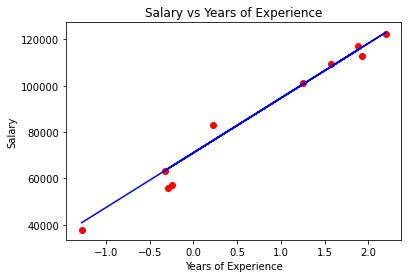

In [12]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()